Testing beat detection, simple trial run before porting to CS

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('runs/08-47-54.csv', header=None)
df = df.rename(columns={0: 'time', 8: 'rh_x', 9: 'rh_y', 10: 'rh_z'})

In [3]:
df_norm = df.diff()
df_norm =  df_norm.div(df_norm.time, axis=0)
df_norm["rh_vel"] = (df_norm["rh_x"]**2 + df_norm["rh_y"]**2 + df_norm["rh_z"]**2)**0.5
df_norm["rh_vel"] = np.minimum(df_norm["rh_vel"] , 10)
rh_vel = df_norm["rh_vel"]

In [4]:
import matplotlib.pyplot as plt

In [5]:
rh_vel_orig = rh_vel.copy()

In [6]:
rh_vel = (rh_vel_orig/2.5) ** 3.5

Overall RH norm of velocity, vs time

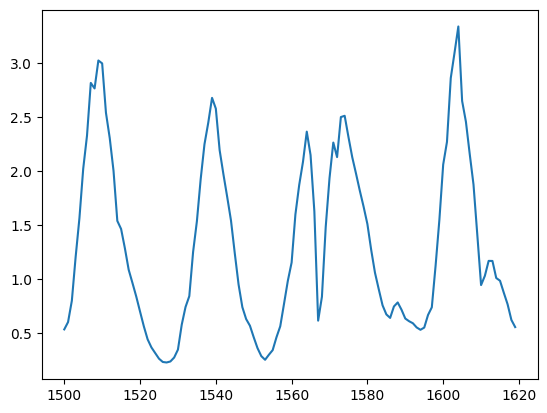

In [7]:
plt.plot(rh_vel_orig[1500:1620])

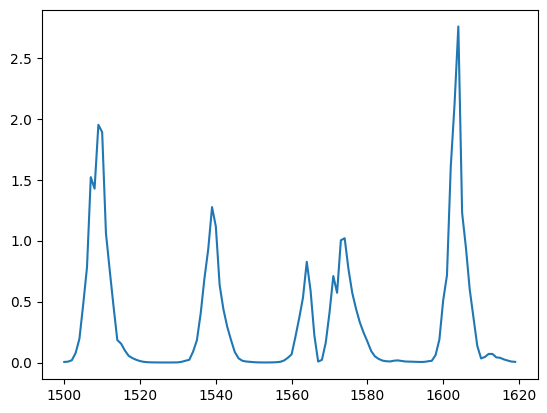

In [8]:
plt.plot(rh_vel[1500:1620])

In [9]:
# Emulate a simple debounce
# Not bothering to use pandas cuz
# 1) my pandas is rusty
# 2) will have to use linear alg in realtime anyways so who cares

norm_threshold = 1
debounce_threshold = 3

peak_detector = np.array([0.0]*len(rh_vel))

in_peak = False
counter = 0
for i in range(len(rh_vel)):
    rh_vel_val = rh_vel[i]

    if in_peak:
        if rh_vel_val < norm_threshold:
            counter += 1
            if counter == debounce_threshold:
                in_peak = False
                counter = 0
    
    if not in_peak:
        if rh_vel_val > norm_threshold:
            counter += 1
            if counter == debounce_threshold:
                in_peak = True
                counter = 0

    peak_detector[i] = norm_threshold if in_peak else 0

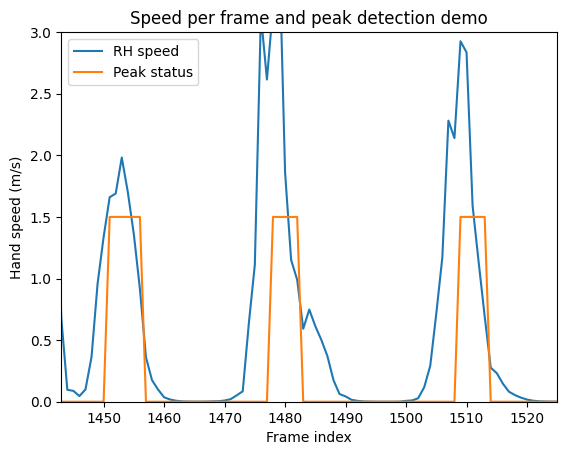

In [10]:
# IDK how to plot oops. it's prob fine anyways
plt.plot((rh_vel[0:1620] * 1.5), label='RH speed')
plt.plot(peak_detector[0:1620] * 1.5, label='Peak status')
plt.xlim(1443, 1525)

plt.ylim(0, 3)
plt.xlabel('Frame index')
plt.ylabel('Hand speed (m/s)')
plt.title('Speed per frame and peak detection demo')
plt.legend()

In [11]:
plt.close()